In [4]:
import os
import pickle
import numpy as np
import pandas as pd
from pandas.core.window import _flex_binary_moment, _Rolling_and_Expanding
import matplotlib.pyplot as plt
directory2 = '../../cc3/rice_data/after_ema_parsing/ecg_ppg_final_weighted_day_5/'
count = 0
df_col = []
ema_day = []
for f in os.listdir(directory2):
    if f[-1]!='p':
        continue
    data,ema = pickle.load(open(directory2+f,'rb'))
    print(ema['label'].unique())
    for day in ema['day'].unique():
        ema_day.append(ema[ema.day==day])
        if ema_day[-1].shape[0]<1:
            ema_day = ema_day[:-1]
            continue
        if data[data.day==day]['stress_likelihood_ppg_qual'].dropna().shape[0]<120:
            ema_day = ema_day[:-1]
            continue
        df_col.append(data[data.day==day])
#         count+=ema_day[-1].shape[0]


[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0]
[0 1]
[0 1]
[0 1]
[0]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0]
[0 1]
[0 1]
[0 1]
[0]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0]


In [5]:
data = pd.concat(df_col[:100])

In [6]:
data['diff_60'] = np.abs(data['60'] - data['60_all'])
data['diff_100'] = np.abs(data['100'] - data['100_all'])

In [7]:
data = data.dropna()

In [ ]:
def get_data(df):
#     columns = list(df.columns)+['day_length']
    df['day_length'] = [df.shape[0]]*df.shape[0]
    return df
data1 = data.groupby(['user','hand','day']).apply(get_data)

In [ ]:
data.head()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

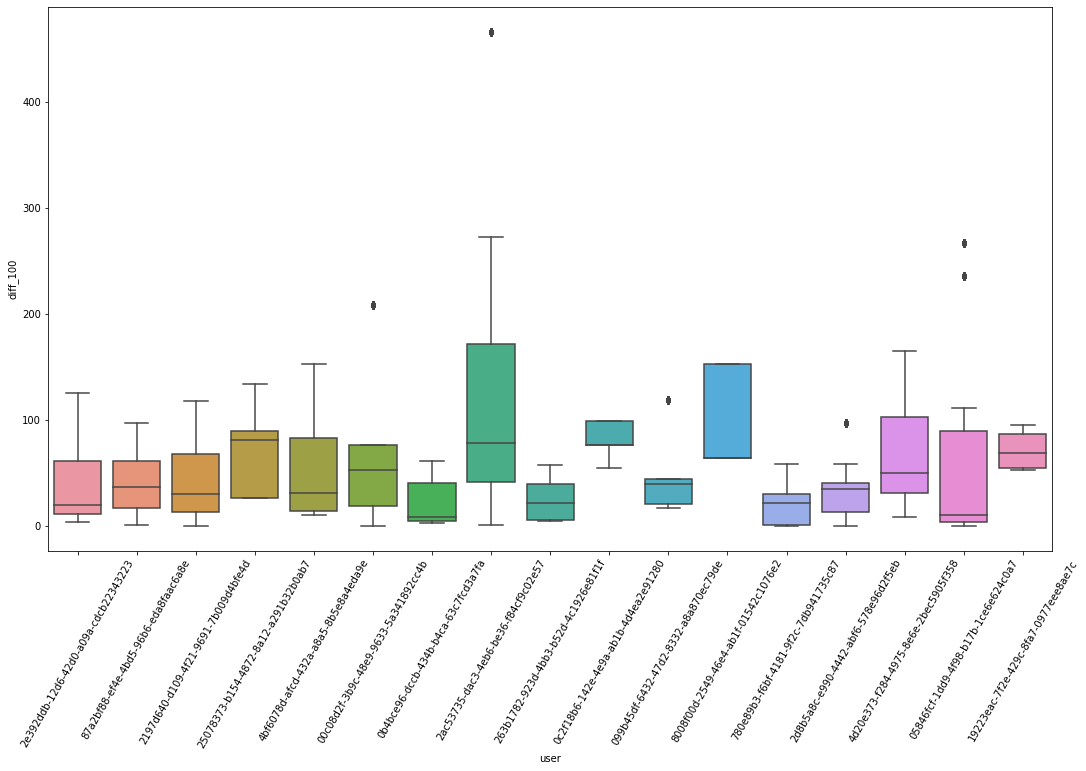

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))
# plt.scatter(data['60'],data['60_all'])
# plt.show()
import seaborn as sns
sns.boxplot(x="user", y="diff_100", data=data)
plt.xticks(rotation=60)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

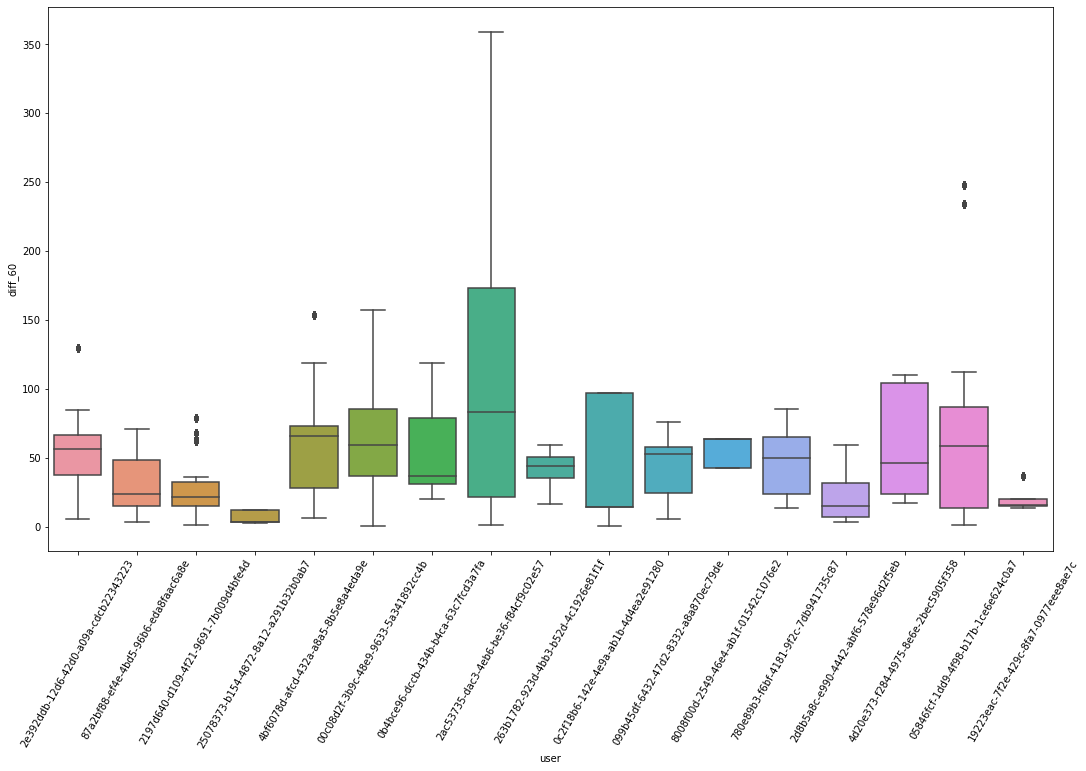

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))
# plt.scatter(data['60'],data['60_all'])
# plt.show()
import seaborn as sns
sns.boxplot(x="user", y="diff_60", data=data)
plt.xticks(rotation=60)